<a href="https://colab.research.google.com/github/victoribeir0/emo_rec_python/blob/main/emo_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

url_dados = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/dados.csv'
url_seq_3_unico = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/seq_viz_3_unico.csv'
url_seq_5_unico = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/seq_5_viz_unico.csv'
url_seq_3_dist = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/seq_3_viz_dist.csv'
url_seq_5_dist = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/seq_5_viz_dist.csv'
url_seq_8_dist = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/seq_8_viz_dist.csv'
url_seq_16_dist = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/seq_16_viz_dist.csv'
url_seq_3 = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/seq_3_viz.csv'
url_seq_5 = 'https://raw.githubusercontent.com/victoribeir0/emo_rec_python/main/seq_5_viz.csv'

dados = pd.read_csv(url_dados, header=None)
seq = pd.read_csv(url_seq_3, header=None)

#dados.columns = ['f0','jit','shimmer','dif_picos']

triste = dados.iloc[:784,:]
raiva = dados.iloc[784:784*2,:]
feliz = dados.iloc[784*2:784*3,:]
neutro = dados.iloc[784*3:784*4,:]
seq.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.6974,-60.677,-90.5460,34.309,7.3319,35.427,-34.9930,18.839,-55.6710,-69.237,0
1,76.0390,-62.369,-42.8860,-30.909,40.6200,-29.365,-40.9900,71.968,-42.8560,37.385,0
2,36.0280,26.652,-5.2875,31.911,-7.0538,46.609,-9.1701,119.390,-42.8000,57.449,0
3,36.0280,26.652,-5.2875,31.911,-7.0538,46.609,-9.1701,119.390,-42.8000,57.449,0
4,78.7850,46.349,-41.6900,18.195,36.1520,-27.217,38.7320,86.803,4.4947,0.221,0


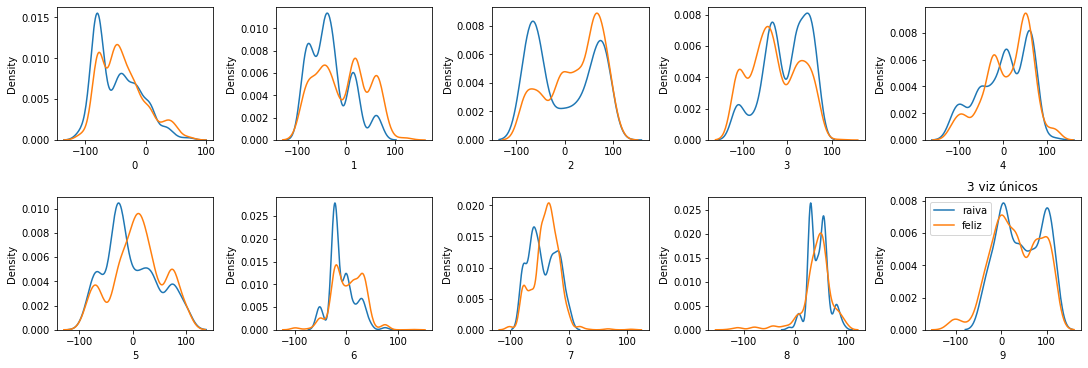

In [ ]:
# Distribuição para 3 vizinhos únicos (o 3° para frente e o 3° para trás).
triste_mds = seq.loc[seq[10] == 0,:]
raiva_mds = seq.loc[seq[10] == 1,:]
feliz_mds = seq.loc[seq[10] == 2,:]
neutro_mds = seq.loc[seq[10] == 3,:]

fig, axes = plt.subplots(2, 5, figsize=(15, 5), constrained_layout=True)
n = 0

for j in range(2):
  for i in range(5):
    sns.kdeplot(ax=axes[j,i], data=raiva_mds.iloc[:,n], label='raiva')
    sns.kdeplot(ax=axes[j,i], data=feliz_mds.iloc[:,n], label='feliz')    
    n += 1

plt.title('3 viz únicos')
plt.legend()

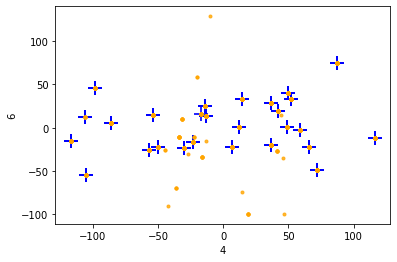

In [ ]:
sns.regplot(x=raiva_mds.iloc[:,4], y=raiva_mds.iloc[:,6], fit_reg=False, marker='+', scatter_kws={"color":"blue",'s':200})
sns.regplot(x=feliz_mds.iloc[:,4], y=feliz_mds.iloc[:,6], fit_reg=False, marker='.', scatter_kws={"color":"orange"})

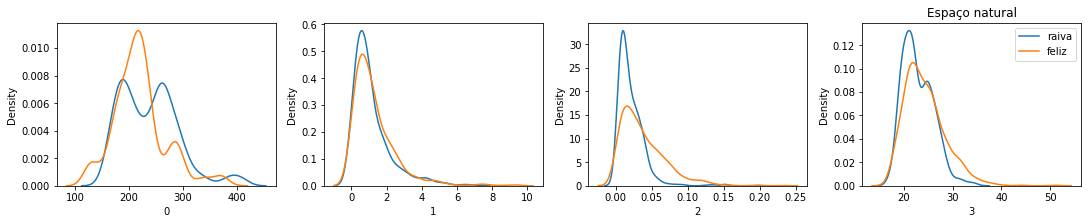

In [ ]:
# Distribuição no espaço natural (F0, Jitter, Shimmer e Média da diferença entre as ondas),
fig, axes = plt.subplots(1, 4, figsize=(15, 3), constrained_layout=True)
n = 0

for i in range(4):
  sns.kdeplot(ax=axes[i], data=raiva[i], label='raiva')
  sns.kdeplot(ax=axes[i], data=feliz[i], label='feliz')    
  n += 1

plt.title('Espaço natural')
plt.legend()